In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [198]:
df_index=pd.read_csv("economic_index.csv")

In [200]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [202]:
# Drop unnecessary
df_index.drop(columns=['Unnamed: 0','year','month'],axis=1,inplace=True)

In [204]:
# Check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

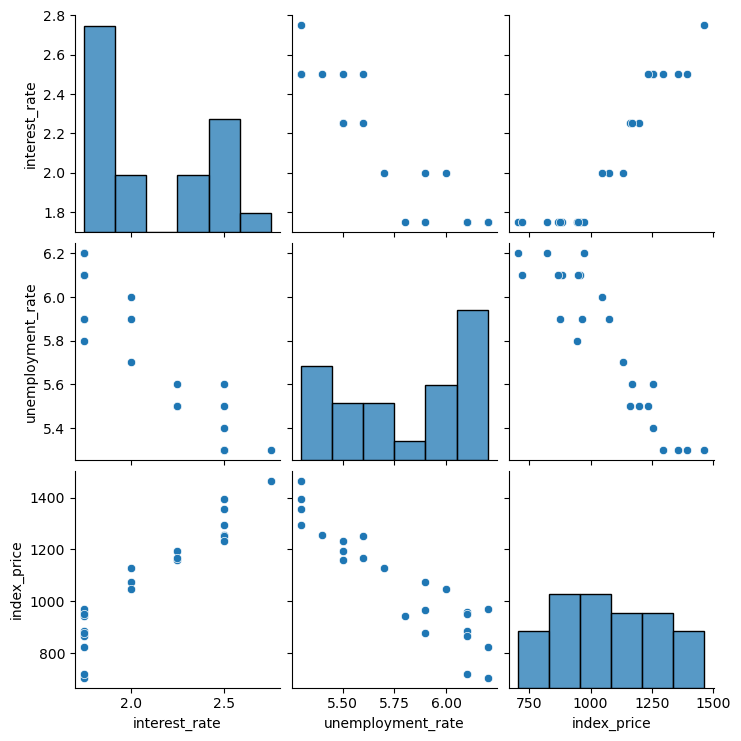

In [206]:
import seaborn as sns
sns.pairplot(df_index)

In [208]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'Unemployment Rate')

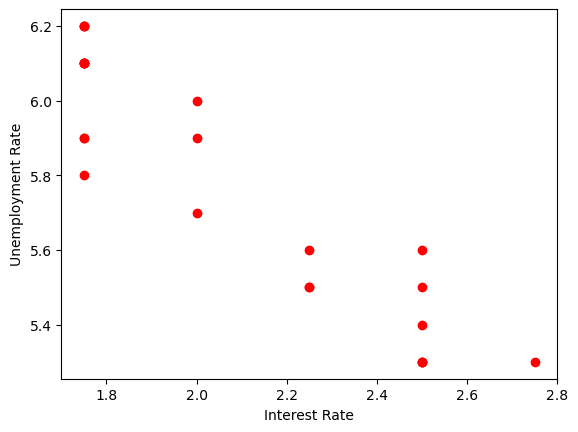

In [210]:
# visualize the data points more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color="r")
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

In [212]:
# Independent and Dependent Feature
#X=df_index[["interest_rate","unemployment_rate"]]
X=df_index.iloc[:,:-1]
y=df_index.iloc[:,-1]

In [214]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [216]:
y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [218]:
# train-test split
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train,y_Test=train_test_split(X,y,test_size=0.25,random_state=42)

In [220]:
y_Train.head()
y_Test.head()

8     1159
16     971
0     1464
18     884
11    1075
Name: index_price, dtype: int64

<Axes: xlabel='interest_rate', ylabel='index_price'>

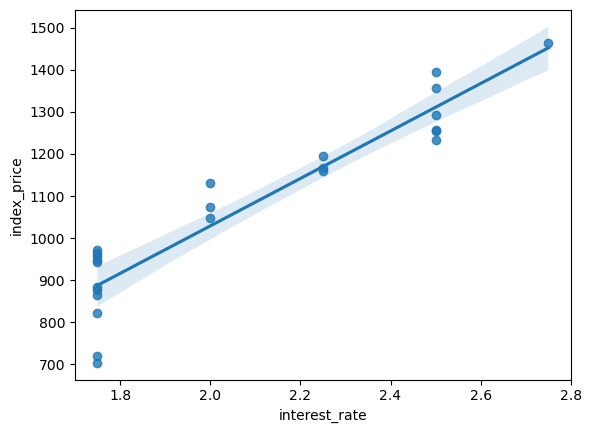

In [222]:
import seaborn as sns
sns.regplot(x=df_index['interest_rate'],y=df_index['index_price'])

In [224]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_Train=scaler.fit_transform(X_Train)
X_Test=scaler.transform(X_Test)

In [226]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_Train,y_Train)

LinearRegression()

In [228]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_Train,y_Train,scoring='neg_mean_squared_error',cv=3 )

In [230]:
np.mean(validation_score)

-5914.8281801623925

In [232]:
## Prediction
y_pred=regression.predict(X_Test)

In [234]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

In [237]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse=mean_squared_error(y_Test,y_pred)
mae=mean_absolute_error(y_Test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.76288771258
59.93578152323554
76.11677139574813


In [245]:
from sklearn.metrics import r2_score
score=r2_score(y_Test,y_pred)
print(score)
Adj_score=1-(((1-score)*(len(y_Test)-1))/(len(y_Test)-X_Test.shape[1]-1))
print(Adj_score)

0.8278978091457142
0.713163015242857


# Assumption


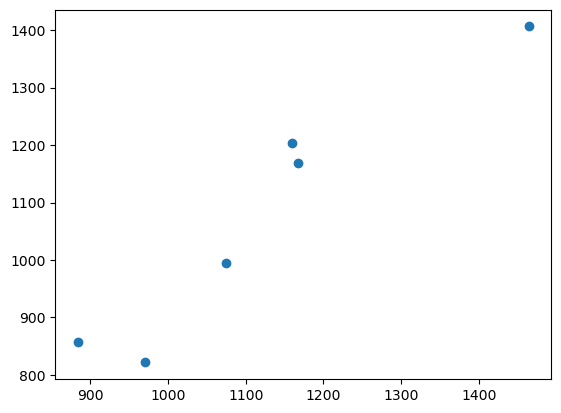

In [250]:
plt.scatter(y_Test,y_pred)
# Between y_test and y_pred there is linear relationship means model is performing wel

In [252]:
residuals=y_Test-y_pred

In [254]:
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

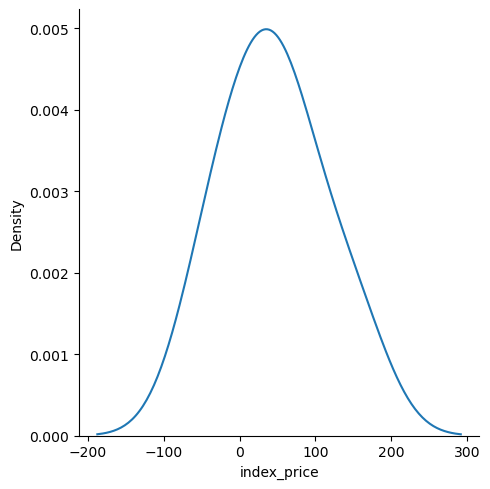

In [258]:
# Plot this residuals
sns.displot(residuals,kind='kde')

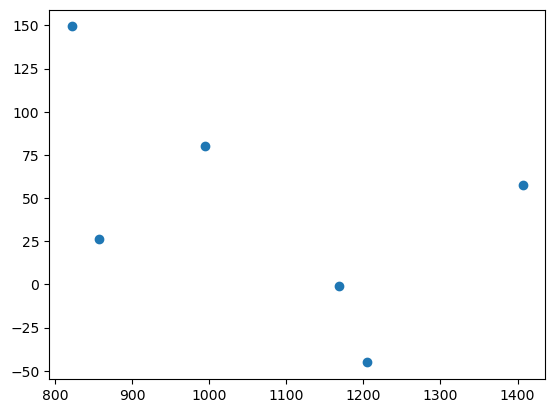

In [260]:
# scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)
# No pattern is seen in the plot

In [266]:
## OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_Train,X_Train).fit()
prediction=model.predict(X_Test)
print(prediction)
print(model.summary())

[ 150.78325954 -231.79392541  353.06855924 -195.73554836  -58.53452146
  114.72488249]
                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Wed, 15 Jan 2025   Prob (F-statistic):                       0.754
Time:                        21:51:33   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err 

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)
